# Goal
This post is inspired by the blog "[Machine Learning Mastery -  How to Develop a 1D Generative Adversarial Network From Scratch in Keras](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/)" written by Jason Brownlee, PhD. But to learn step-by-step, I will describe the same concept with PyTorch.


This post will cover the followings: 

Part 1: 
* Select a One-Dimensional Function
* Define a Discriminator Model




**Reference**
* [How to Develop a 1D Generative Adversarial Network From Scratch in Keras](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/)
* [Wikipedia - Generative adversarial network (GAN)](https://en.wikipedia.org/wiki/Generative_adversarial_network)

# Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch
import torch
from torch import nn
from torch import optim
from torchviz import make_dot

# Create a target 1-D function

In [3]:
def f(x):
    return x **2

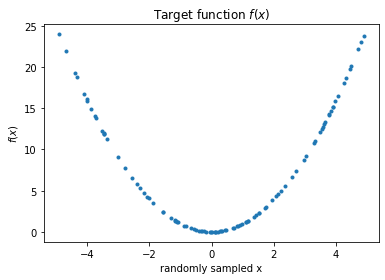

In [17]:
n = 100
sigma = 10
x = sigma * (np.random.random(size=n) - 0.5)
plt.plot(x, f(x), '.');
plt.title('Target function $f(x)$');
plt.xlabel('randomly sampled x');
plt.ylabel('$f(x)$');

# Define a **Discriminator Model**
The definition of a **discriminator** model is that it will classify the input data into **real or fake**


In [35]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(2, 25),
                      nn.ReLU(),
                      nn.Sigmoid()
                     )

# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

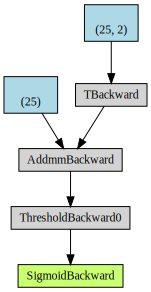

In [36]:
# Visualize this neural network
x = torch.zeros(0, 2, dtype=torch.float, requires_grad=False)
out = model(x)
make_dot(out)

# Create real and fake samples



In [79]:
def generate_samples(size=100, label='real'):
    """Generate samples with real or fake label
    """
    x = np.random.randn(100, 1)
    x2 = f(x)
    
    y = np.ones((size, 1)) * (label == 'real')
    return np.hstack([x, x2]), y
    

In [80]:
X, y = generate_samples()

In [82]:
x[:5]

array([[ 1.2483621 ,  1.55840793],
       [ 0.57980381,  0.33617245],
       [-0.06718955,  0.00451444],
       [-1.95352245,  3.81624995],
       [-1.14922801,  1.32072501]])

In [83]:
y[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])